In [121]:
import numpy as np
import matplotlib.pyplot as plt
import iop_ext as iop
from iop_ext import radius_iop  # import Artem's model to calculate planet radius based on 4 parameters

In [122]:
# import NEA masses and radii

nea_output_file = "./data/catalog_exoplanets.dat" #starting from where THIS file is: astro9? or if i move it i need to change this line

list_catalog_rp, list_catalog_mp = np.genfromtxt(nea_output_file, delimiter="\t", unpack=True, usecols=(1,4), filling_values=0.0)

print("Exoplanet catalog imported successfully.")

Exoplanet catalog imported successfully.


In [123]:
#import mass-radius models from Li Zeng 2016 - IRON

# pure iron planet
list_zeng_fe_m, list_zeng_fe_r = np.loadtxt("./models/zeng-iron.dat", unpack=True, usecols=(0,1)) #rename this if i move this file

print("Mass-radius data curves imported successfully.")

Mass-radius data curves imported successfully.


In [124]:
# import mass-radius models from Li Zeng 2016

#earth?
list_zeng_earth_m, list_zeng_earth_r = np.loadtxt("./models/zeng-earth.dat", unpack=True, usecols=(0,1)) #rename this if i move this file

print("Mass-radius data curves imported successfully")

Mass-radius data curves imported successfully


In [125]:
# import mass-radius models from Li Zeng 2016

#pure rock planet?
list_zeng_rock_m, list_zeng_rock_r = np.loadtxt("./models/zeng-rock.dat", unpack=True, usecols=(0,1)) #rename this if i move this file

print("Mass-radius data curves imported successfully.")

Mass-radius data curves imported successfully.


In [126]:
# import 50% water data from Li Zeng 2016

#50% water
list_zeng_water_m, list_zeng_water_r = np.loadtxt("./models/Zeng2016.dat", unpack=True, usecols=(0,3))

print ("Mass-radius data curves imported successfully")

Mass-radius data curves imported successfully


In [127]:
# import aguichine data from Aguichine 2021

# i dont even know, 50% steam planet?
list_aguichine_m, list_aguichine_r = np.loadtxt("./models/Aguichine2021_mr_all_2024.dat", unpack=True, usecols=(0,1))

print ("Mass-radius data curves imported successfully")

Mass-radius data curves imported successfully


In [128]:
# import data from TOI-836b planet evolution

toi836bMass, toi836bRadius = np.loadtxt("./evolution_TOI-836b_HF.dat", unpack=True, usecols=(1,2))

print("yippie")

yippie


In [129]:
# import data from Alex

k218bMass, k218bRadius = np.loadtxt("./evolution_K2-18b_AC.dat", unpack=True, usecols=(1,2))

print("yippie")

yippie


In [130]:
# import data from Javier

k23cMass, k23cRadius = np.loadtxt("./evolution_K2-3c_JJ.dat", unpack=True, usecols=(1,2))

print("yippie")

yippie


In [131]:
# import data from Javier again

kepler138cMass, kepler138cRadius = np.loadtxt("./evolution_Kepler-138c_JJ.dat", unpack=True, usecols=(1,2))

print("yippie")

yippie


In [135]:
# import hot planet data

epic201595106bMass, epic201595106bRadius = np.loadtxt("./evolution_epic201595106b_HF.dat", unpack=True, usecols=(1,2))

print("yippie")

yippie


In [132]:
cmf = 0.325 #core mass fraction
wmf = 0.5 #water mass fraction
teq = 600 #temperature equilibrium

# Define the mass-radius calculation for the steam atmosphere planet
planet_masses = np.logspace(np.log10(0.1), np.log10(20.0), 100)

# Now calculate radii for each mass (using radius_iop function)
radii = np.array([radius_iop(cmf, wmf, teq, mp) for mp in planet_masses])
errors = np.array([iop.error_iop(cmf, wmf, teq, mp) for mp in planet_masses])

mask_valid = (errors == 0)

print(mask_valid)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True]


In [133]:
from lf14 import radius_lf14

met = 1.0
age = 5.0
fenv = 5.0
teq = 600

planet_masses_2 = np.logspace(np.log10(0.1), np.log10(20.0), 1000)

radii_2 = np.array([radius_lf14(met, age, fenv, teq, mp) for mp in planet_masses_2])

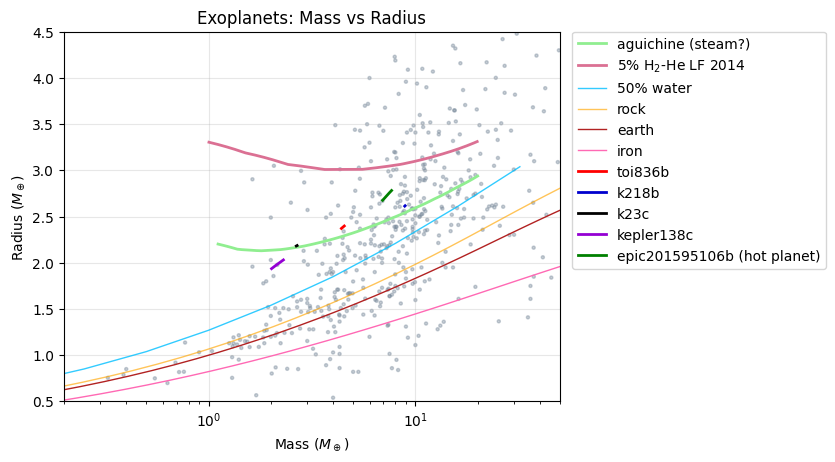

In [140]:
# make the plot

Mearth = 5.97219*(10**(24)) #mass of earth in kg
Rearth = 6.371*(10**6) #radius of earth in m


N_exo = len(list_catalog_mp) #length/number of data values in list_catalog_mp
point_sizes = np.ones(N_exo)*5.0 #size of each point

# plot the exoplanets
plt.scatter(list_catalog_mp, list_catalog_rp, color="lightslategrey", alpha=0.4, sizes=point_sizes)

plt.plot(planet_masses[mask_valid], radii[mask_valid], label="aguichine (steam?)", color="lightgreen", linestyle="-", linewidth=2)
plt.plot(planet_masses_2, radii_2, label=r"5% H$_2$-He LF 2014", color="palevioletred", linestyle="-", linewidth=2)
plt.plot(list_zeng_water_m, list_zeng_water_r, color="deepskyblue", alpha=0.8, linestyle="-", linewidth=1, label="50% water")
plt.plot(list_zeng_rock_m, list_zeng_rock_r, color="orange", alpha=0.65, linestyle="-", linewidth=1, label="rock")
plt.plot(list_zeng_earth_m, list_zeng_earth_r, color="firebrick", linestyle="-", linewidth=1, label="earth")
plt.plot(list_zeng_fe_m, list_zeng_fe_r, color="hotpink", linestyle="-", linewidth=1, label="iron")

plt.plot(toi836bMass/Mearth, toi836bRadius/Rearth, color="red", linestyle="-", linewidth=2, label="toi836b")
# plt.plot(Mass/Mearth, Radius/Rearth, color="green", linestyle="-", linewidth=2, label="")
plt.plot(k218bMass/Mearth, k218bRadius/Rearth, color="mediumblue", linestyle="-", linewidth=2, label="k218b")
plt.plot(k23cMass, k23cRadius, color="black", linestyle="-", linewidth=2, label="k23c") #javier's were already in earth masses/radii
plt.plot(kepler138cMass, kepler138cRadius, color="darkviolet", linestyle="-", linewidth=2, label="kepler138c") # ^^^
plt.plot(epic201595106bMass/Mearth, epic201595106bRadius/Rearth, color="green", linestyle="-", linewidth=2, label="epic201595106b (hot planet)")

plt.legend(loc="center right", bbox_to_anchor=(1.55, .68))

plt.xscale("log") # put the x axis in logarithmic scale
plt.xlim(0.2, 50) # bounding the x axis to 0.2 earth masses to 50 earth masses
plt.ylim(0.5, 4.5) #bounding x axis from 0.5 earth radii to 4.5 earth radii

plt.grid(True, alpha=0.3)

# label the figure
plt.xlabel("Mass ($M_\\oplus$)")
plt.ylabel("Radius ($M_\\oplus$)")
plt.title("Exoplanets: Mass vs Radius")


plt.show()